import csv file

In [109]:
import pandas as pd
df= pd.read_csv("hotel_booking.csv")

data cleaning


Handling missing values

In [110]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [111]:
df['country'] = df['country'].fillna('Unknown')


In [112]:
df['agent'] = df['agent'].fillna(0).astype(int)

In [113]:
df['company'] = df['company'].fillna(0).astype(int)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

object --> categorical

In [115]:
cat_cols = [
    'hotel', 'arrival_date_month', 'meal', 'country',
    'market_segment', 'distribution_channel',
    'reserved_room_type', 'assigned_room_type',
    'deposit_type', 'customer_type', 'reservation_status'
]

for col in cat_cols:
    df[col] = df[col].astype('category')

object → datetime64

In [116]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

float--> int

In [117]:
df['children'] = df['children'].fillna(0).astype('int64')

In [118]:
df["agent"] = df["agent"].astype('int64')

In [119]:
df["company"] = df["company"].astype('int64')

int--> bool


In [120]:
df["is_canceled"] = df["is_canceled"].astype('bool')

In [121]:
df["is_repeated_guest"] = df["is_repeated_guest"].astype('bool')

In [122]:
df.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798,NaN


Outlier detection

In [123]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols


Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

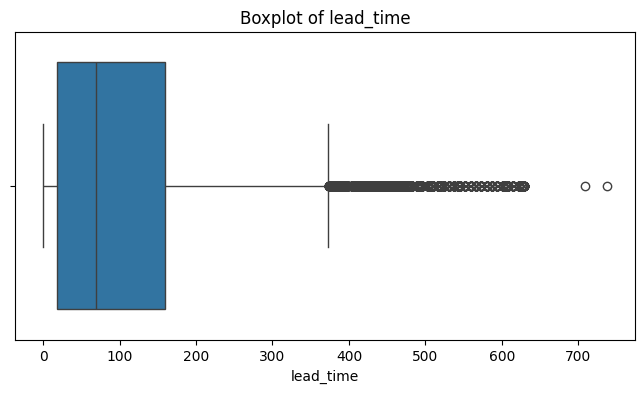

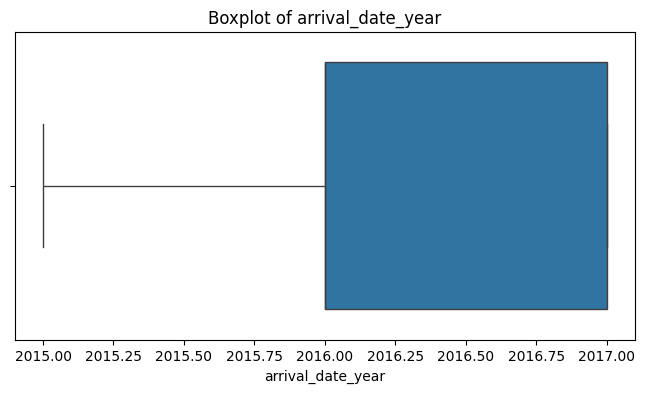

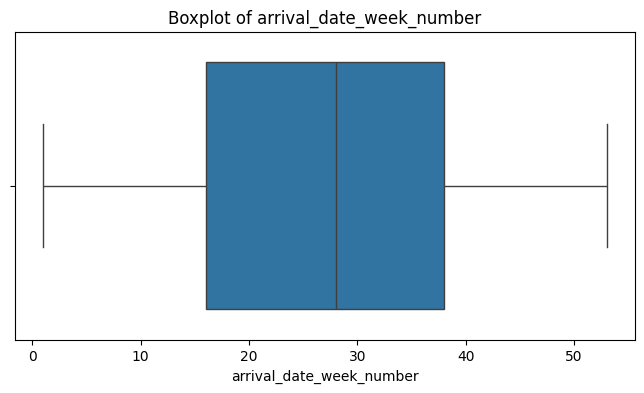

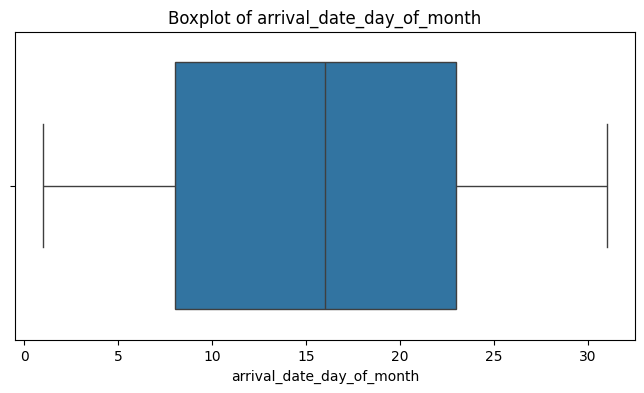

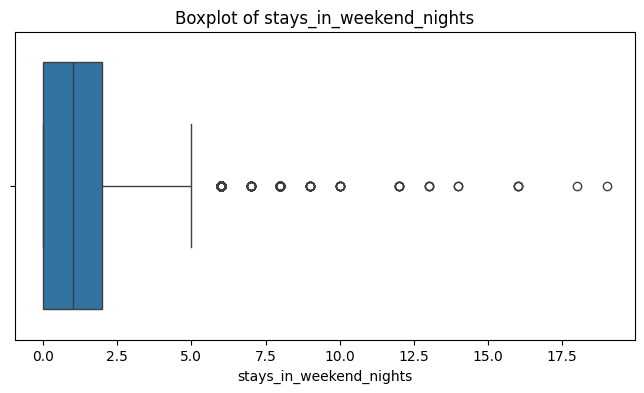

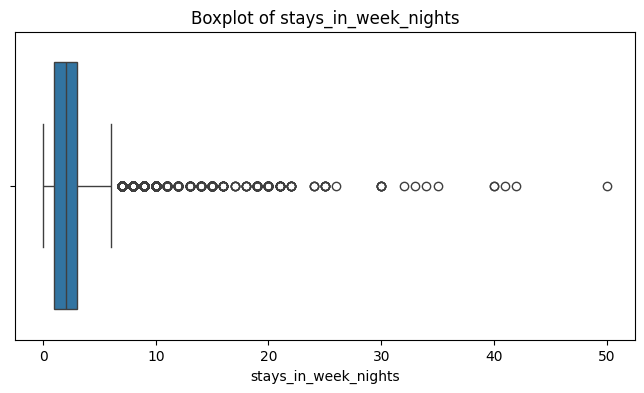

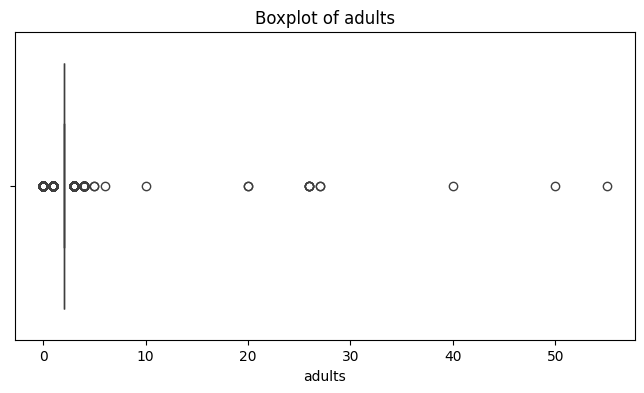

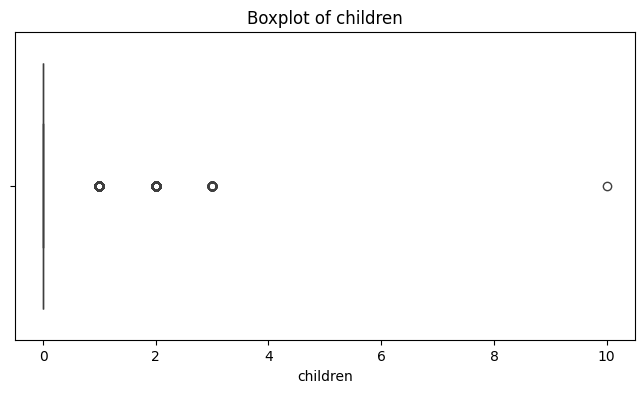

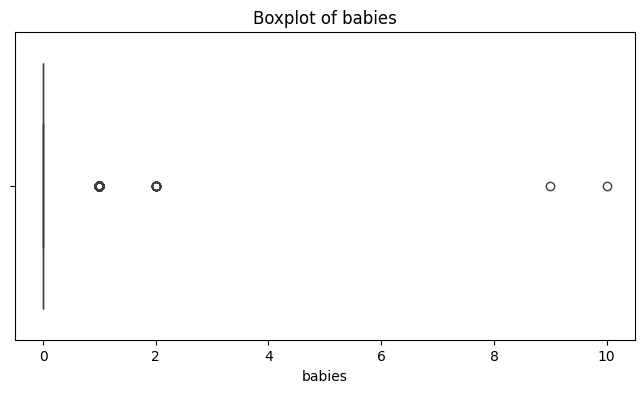

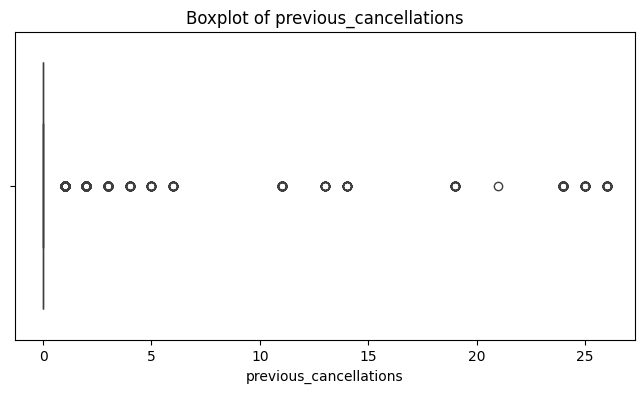

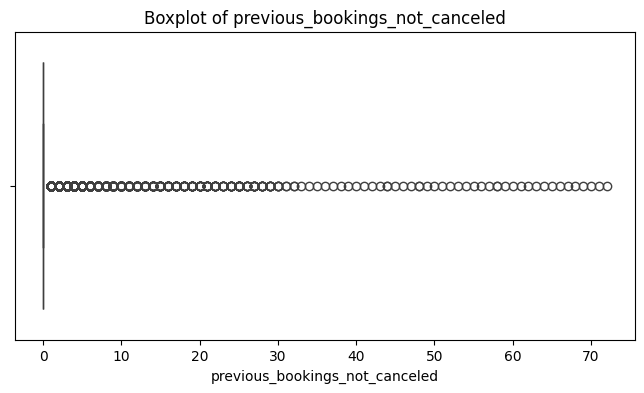

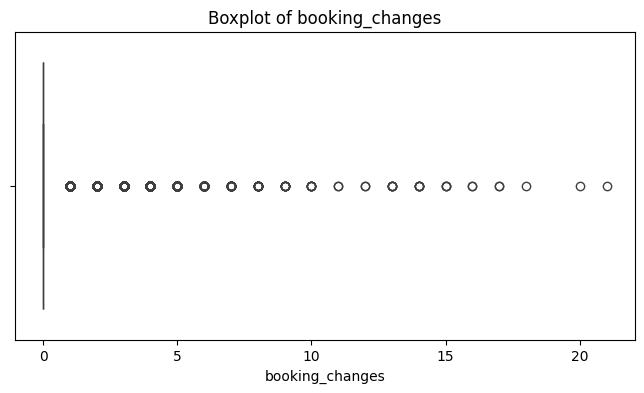

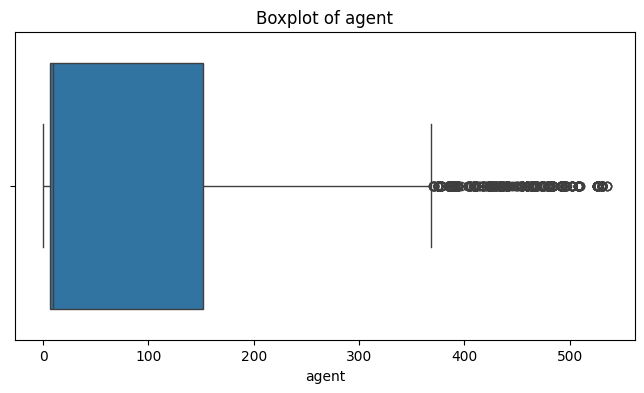

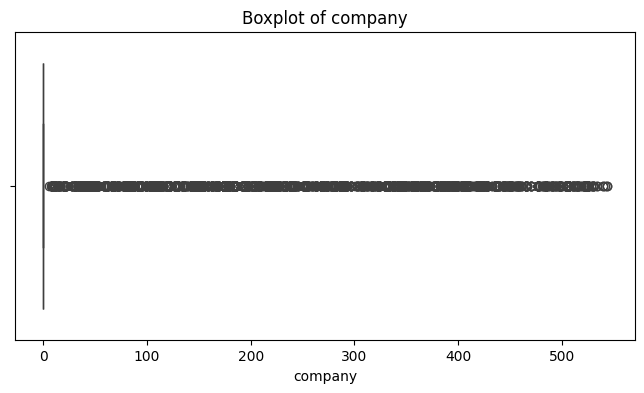

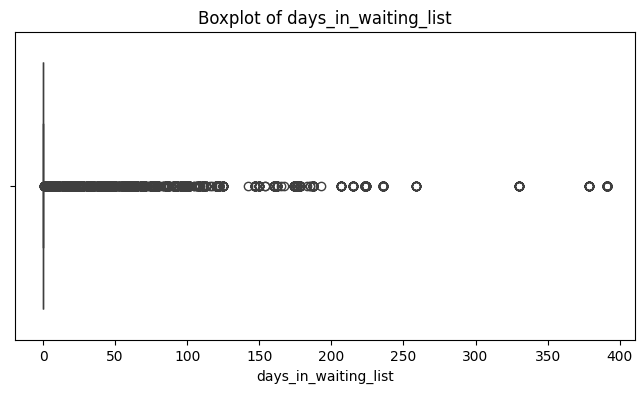

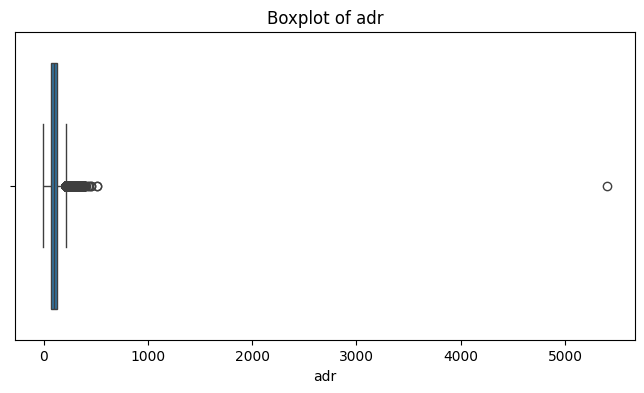

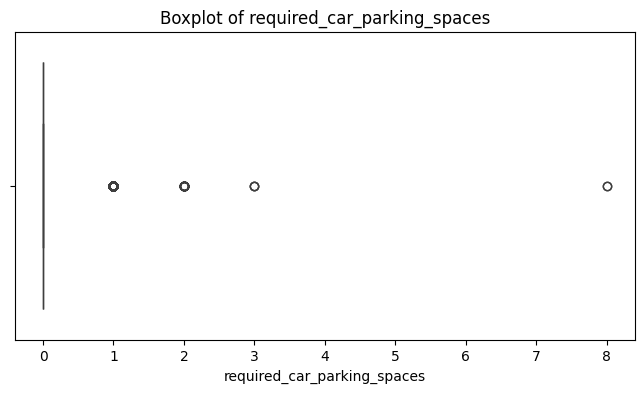

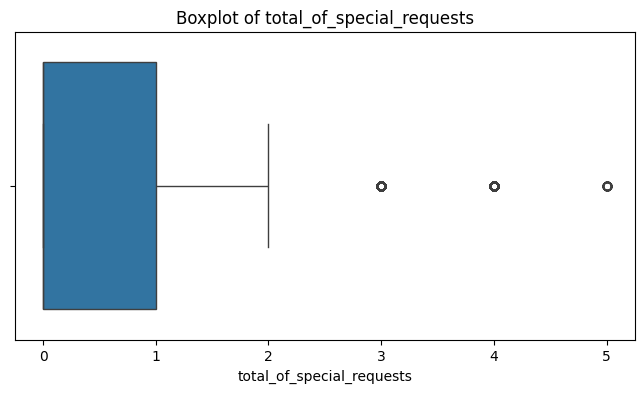

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


almost all numerical columns have outliers.

outlier report

In [125]:
cols_with_outliers = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 
    'adults', 'children', 'babies', 'previous_cancellations', 
    'previous_bookings_not_canceled', 'booking_changes', 'agent', 
    'company', 'days_in_waiting_list', 'adr', 
    'required_car_parking_spaces', 'total_of_special_requests'
]
outlier_summary = {}

for col in cols_with_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    outlier_summary[col] = {
        "Total Rows": df[col].shape[0],
        "Outlier Count": outliers.shape[0],
        "Outlier %": round(outliers.shape[0] / df[col].shape[0] * 100, 2),
        "Min Value": df[col].min(),
        "Max Value": df[col].max(),
        "Lower Bound": round(lower,2),
        "Upper Bound": round(upper,2)
    }

outlier_report = pd.DataFrame(outlier_summary).T
print(outlier_report)


                                Total Rows  Outlier Count  Outlier %  \
lead_time                         119390.0         3005.0       2.52   
stays_in_weekend_nights           119390.0          265.0       0.22   
stays_in_week_nights              119390.0         3354.0       2.81   
adults                            119390.0        29710.0      24.88   
children                          119390.0         8590.0       7.19   
babies                            119390.0          917.0       0.77   
previous_cancellations            119390.0         6484.0       5.43   
previous_bookings_not_canceled    119390.0         3620.0       3.03   
booking_changes                   119390.0        18076.0      15.14   
agent                             119390.0         1254.0       1.05   
company                           119390.0         6797.0       5.69   
days_in_waiting_list              119390.0         3698.0       3.10   
adr                               119390.0         3793.0       

lead time--> max=737 days- no one books the hotel in 2yrs advance-->(Capping) max 1yr


In [126]:
import numpy as np
df["lead_time"] = np.where(df["lead_time"] > 365, 365, df["lead_time"])


stays_in_weekend_nights / stays_in_week_nights--> Max 2 weeks

In [127]:
df["stays_in_weekend_nights"] = np.where(df["stays_in_weekend_nights"] > 14, 14, df["stays_in_weekend_nights"])
df["stays_in_week_nights"] = np.where(df["stays_in_week_nights"] > 14, 14, df["stays_in_week_nights"])

adult can't be more than 4 in a single room. (not allowed)

In [128]:
df["adults"] = np.where(df["adults"] > 4, 4, df["adults"])

children & babies can't be more than 3 & 2 respectively.

In [129]:
df["children"] = np.where(df["children"] > 3, 3, df["children"])
df["babies"] = np.where(df["babies"] > 2, 2, df["babies"])

we can keep previous_cancellations, previous_bookings_not_canceled & booking_changes as it is because it shows customer behaviour

no need to handle agent & company as it is Ids.

days_in_waiting_list can be max 3 months.

In [130]:
df["days_in_waiting_list"] = np.where(df["days_in_waiting_list"] > 90, 90, df["days_in_waiting_list"])

adr(Average Daily Rate) --> max = 500

In [131]:
df["adr"] = np.where(df["adr"] > 500, 500, df["adr"])
df["adr"] = np.where(df["adr"] < 0, 0, df["adr"])

normally, tourist can require max 2 parking space.

In [132]:
df["required_car_parking_spaces"] = np.where(df["required_car_parking_spaces"] > 2, 2, df["required_car_parking_spaces"])

special request can be 5. keep it.

Duplicates check

In [133]:
df.duplicated().sum()

np.int64(0)

Feature Engineering

In [134]:
df["total_guests"] = df["adults"] + df["children"] + df["babies"]

In [135]:
df["total_stay"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]

In [136]:
df["lead_time_cat"] = pd.cut(df["lead_time"], 
                             bins=[0, 30, 90, 180, 365], 
                             labels=["Short", "Medium", "Long", "Very Long"])


In [137]:
df["high_request"] = np.where(df["total_of_special_requests"] >= 3, 1, 0)

In [138]:
df["reservation_month"] = df["reservation_status_date"].dt.month

In [139]:
df["high_canceller"] = np.where(df["previous_cancellations"] > 3, 1, 0)

In [140]:
df["revenue"] = df["adr"] * df["total_stay"] * df["total_guests"]

In [141]:
df["last_minute"] = np.where(df["lead_time"] < 7, 1, 0)

In [142]:
def season(month):
    if month in [12,1,2]:
        return "Winter"
    elif month in [3,4,5]:
        return "Spring"
    elif month in [6,7,8]:
        return "Summer"
    else:
        return "Autumn"

df["season"] = df["reservation_status_date"].dt.month.apply(season)


In [143]:
df["traveller_type"] = np.where(df["total_guests"] > 2, "Family", "Solo/Pair")

In [144]:
room_order = ["A", "B", "C", "D", "E", "F", "G"]
df["reserved_room_type"] = pd.Categorical(df["reserved_room_type"], categories=room_order, ordered=True)
df["assigned_room_type"] = pd.Categorical(df["assigned_room_type"], categories=room_order, ordered=True)


In [145]:
df["room_changed"] = np.where(
    df["reserved_room_type"] < df["assigned_room_type"], "upgraded",
    np.where(df["reserved_room_type"] > df["assigned_room_type"], "downgraded", "no_change")
)

In [146]:
df["cancellation_ratio"] = df["previous_cancellations"] / (
    (df["previous_cancellations"] + df["previous_bookings_not_canceled"] + 1)
)


EDA

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Univariate Analysis — Categorical --> Goal: counts, proportions, and top categories.


--- hotel ---


,count,count
hotel,,
City Hotel,79330,66.45
Resort Hotel,40060,33.55


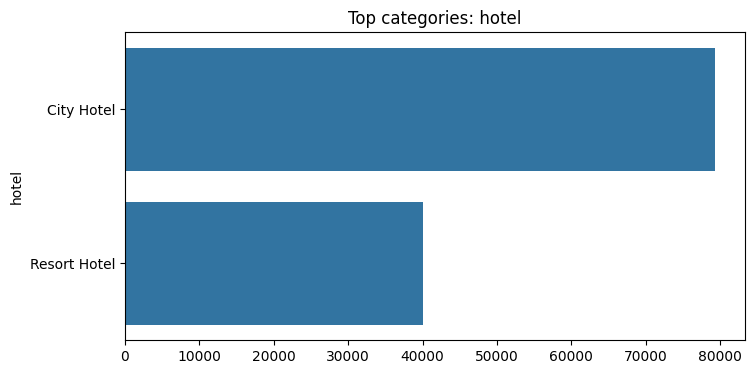


--- market_segment ---


,count,count
market_segment,,
Online TA,56477,47.30
Offline TA/TO,24219,20.29
Groups,19811,16.59
Direct,12606,10.56
Corporate,5295,4.44
Complementary,743,0.62
Aviation,237,0.20
Undefined,2,0.00


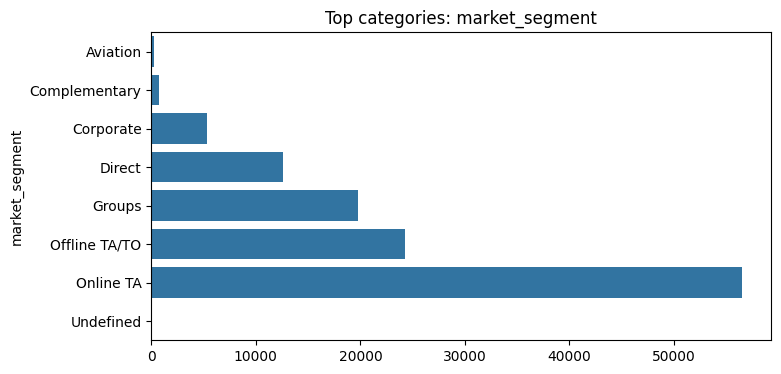


--- distribution_channel ---


,count,count
distribution_channel,,
TA/TO,97870,81.98
Direct,14645,12.27
Corporate,6677,5.59
GDS,193,0.16
Undefined,5,0.00


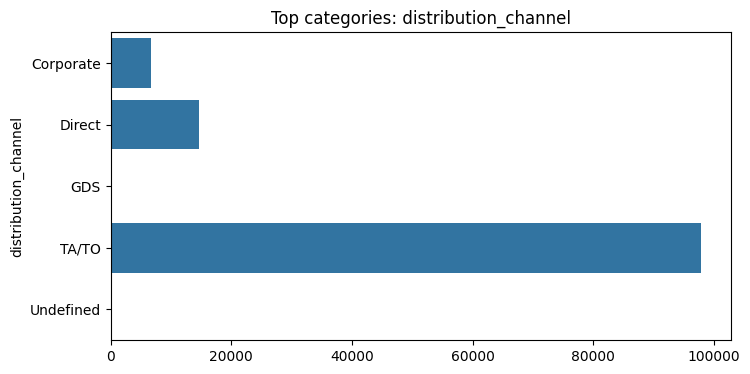


--- meal ---


,count,count
meal,,
BB,92310,77.32
HB,14463,12.11
SC,10650,8.92
Undefined,1169,0.98
FB,798,0.67


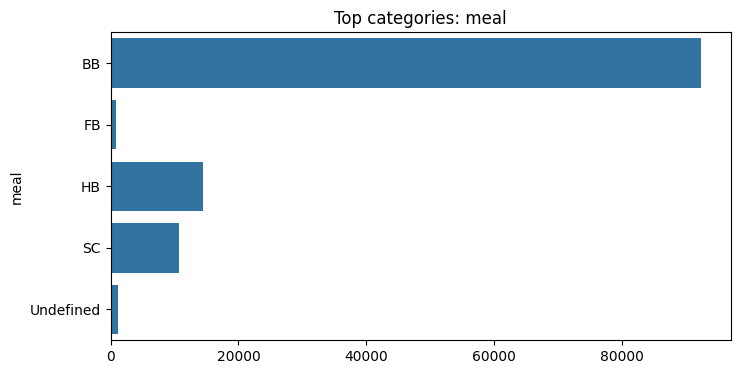


--- customer_type ---


,count,count
customer_type,,
Transient,89613,75.06
Transient-Party,25124,21.04
Contract,4076,3.41
Group,577,0.48


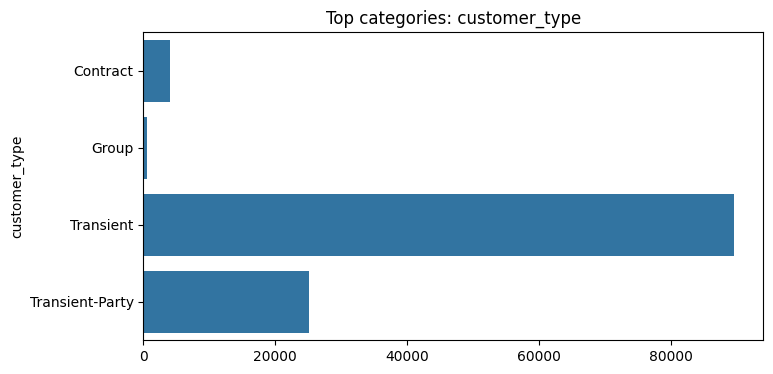


--- deposit_type ---


,count,count
deposit_type,,
No Deposit,104641,87.65
Non Refund,14587,12.22
Refundable,162,0.14


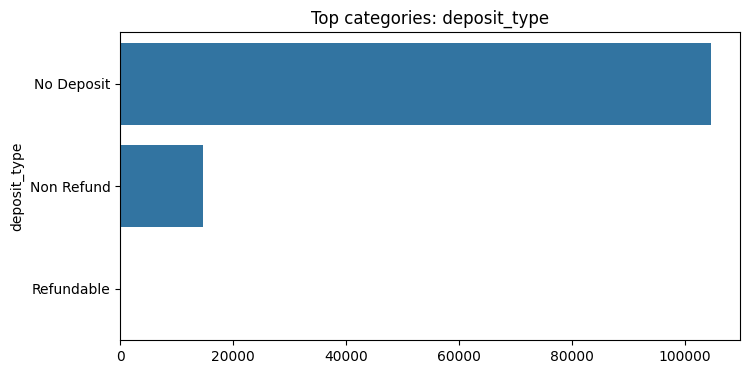


--- country ---


,count,count
country,,
PRT,48590,40.70
GBR,12129,10.16
FRA,10415,8.72
ESP,8568,7.18
DEU,7287,6.10
ITA,3766,3.15
IRL,3375,2.83
BEL,2342,1.96
BRA,2224,1.86


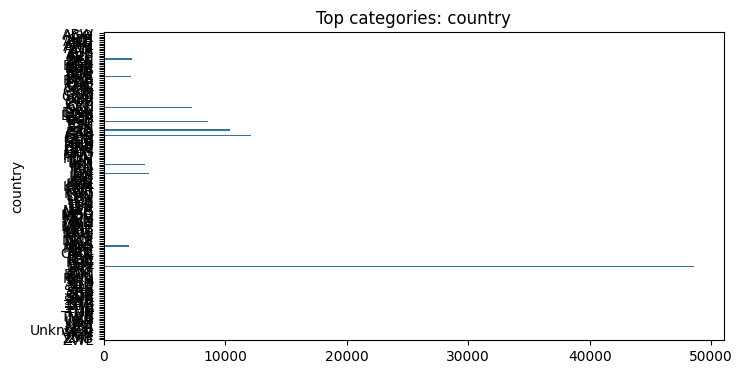


--- reservation_status ---


,count,count
reservation_status,,
Check-Out,75166,62.96
Canceled,43017,36.03
No-Show,1207,1.01


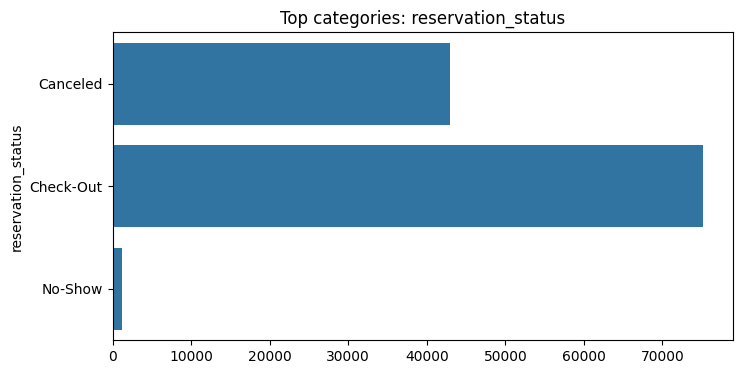

In [148]:
cat_cols = ['hotel','market_segment','distribution_channel','meal','customer_type','deposit_type','country','reservation_status']

for col in cat_cols:
    if col in df.columns:
        vc = df[col].value_counts(dropna=False).head(10)
        print(f"\n--- {col} ---")
        display(pd.concat([vc, (vc/len(df)*100).round(2)], axis=1).rename(columns={col:'count', 0:'%'}))
        plt.figure(figsize=(8,4))
        sns.barplot(x=vc.values, y=vc.index)
        plt.title(f"Top categories: {col}")
        plt.show()


group rare into others

In [149]:
df["market_segment"] = df["market_segment"].replace(
    ["Aviation", "Complementary", "Undefined"], "Other"
)

df["distribution_channel"] = df["distribution_channel"].replace(
    ["GDS", "Undefined"], "Other"
)

df["meal"] = df["meal"].replace(
    ["FB", "Undefined"], "Other"
)

top_countries = df["country"].value_counts().nlargest(10).index
df["country"] = np.where(df["country"].isin(top_countries), df["country"], "Other")

df["is_canceled"] = np.where(df["reservation_status"] == "Canceled", 1, 0)

df.drop(columns=["reservation_status"], inplace=True)

C:\Users\palak\AppData\Local\Temp\ipykernel_24948\1108500484.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["market_segment"] = df["market_segment"].replace(
C:\Users\palak\AppData\Local\Temp\ipykernel_24948\1108500484.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["distribution_channel"] = df["distribution_channel"].replace(
C:\Users\palak\AppData\Local\Temp\ipykernel_24948\1108500484.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for c

Univariate Analysis — Numerical --> Goal: distributions + skew + outliers visually.

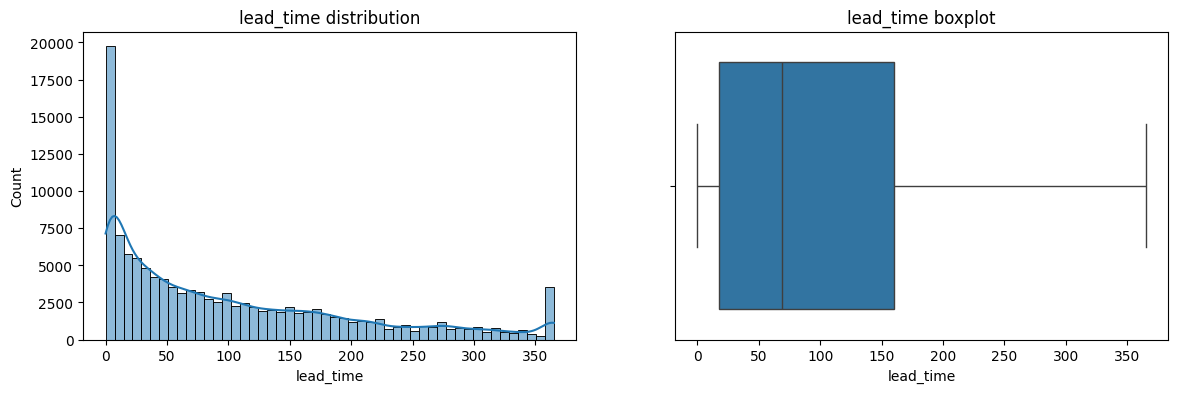

count    119390.000000
mean        102.021735
std         100.610282
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         365.000000
Name: lead_time, dtype: float64
Skew: 1.03
------------------------------------------------------------


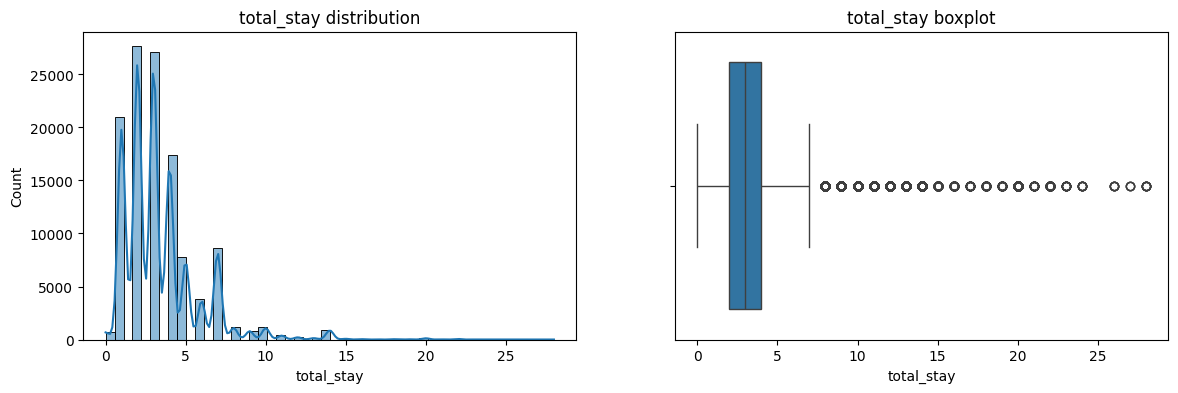

count    119390.000000
mean          3.417816
std           2.456335
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          28.000000
Name: total_stay, dtype: float64
Skew: 2.31
------------------------------------------------------------


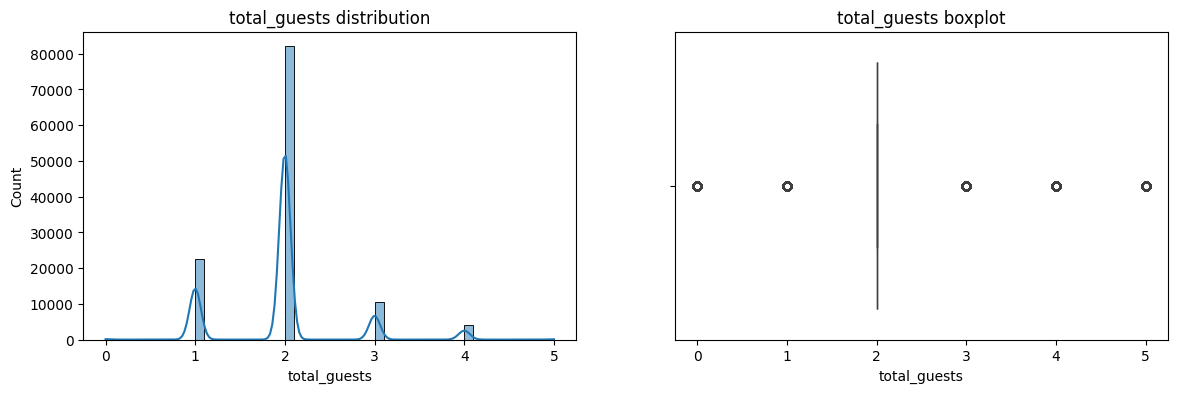

count    119390.000000
mean          1.965282
std           0.651411
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           5.000000
Name: total_guests, dtype: float64
Skew: 0.82
------------------------------------------------------------


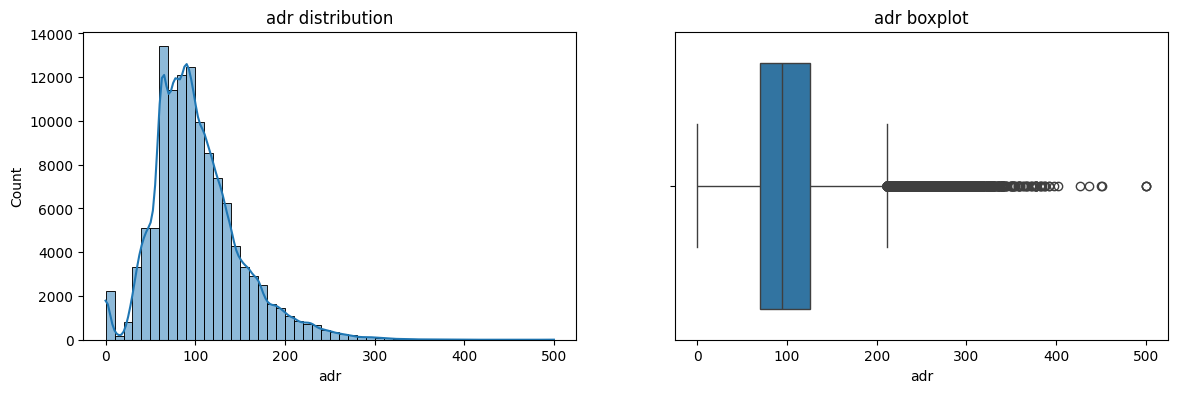

count    119390.000000
mean        101.789982
std          48.165765
min           0.000000
25%          69.290000
50%          94.575000
75%         126.000000
max         500.000000
Name: adr, dtype: float64
Skew: 1.02
------------------------------------------------------------


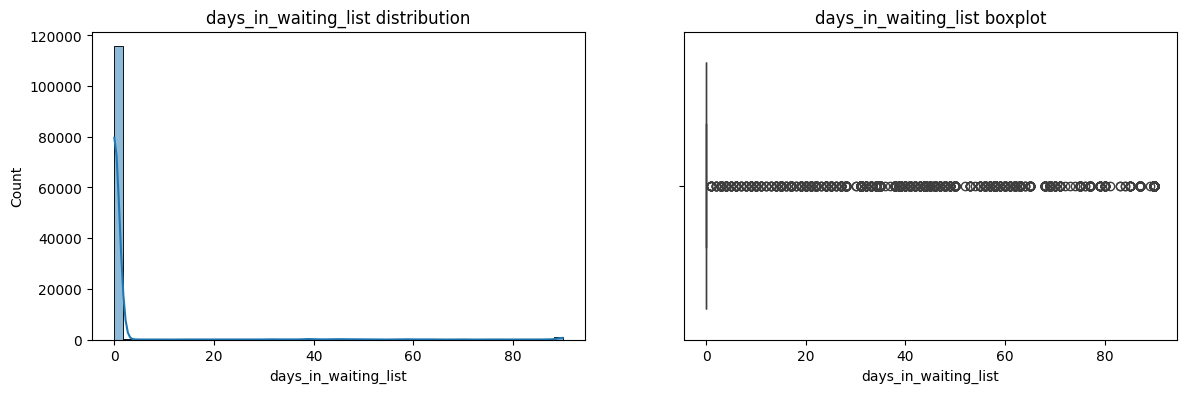

count    119390.000000
mean          1.741017
std          10.811050
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          90.000000
Name: days_in_waiting_list, dtype: float64
Skew: 6.76
------------------------------------------------------------


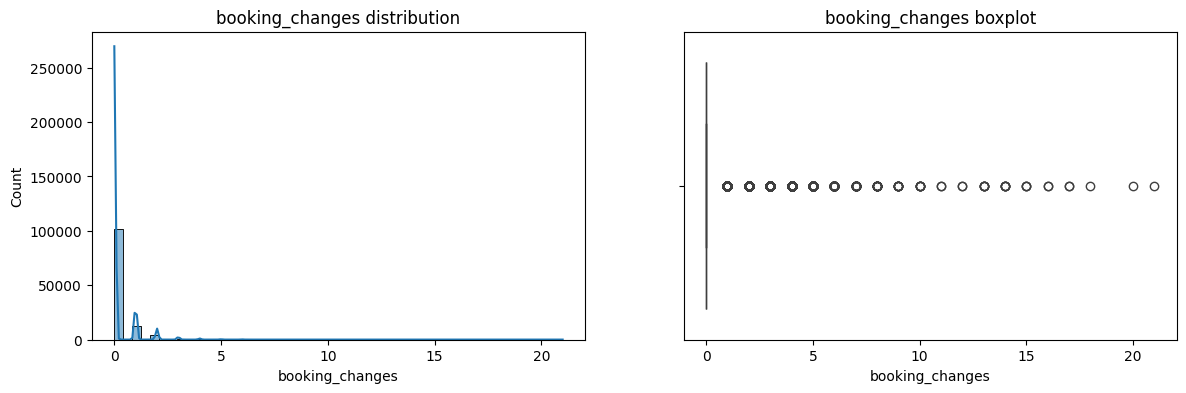

count    119390.000000
mean          0.221124
std           0.652306
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          21.000000
Name: booking_changes, dtype: float64
Skew: 6.0
------------------------------------------------------------


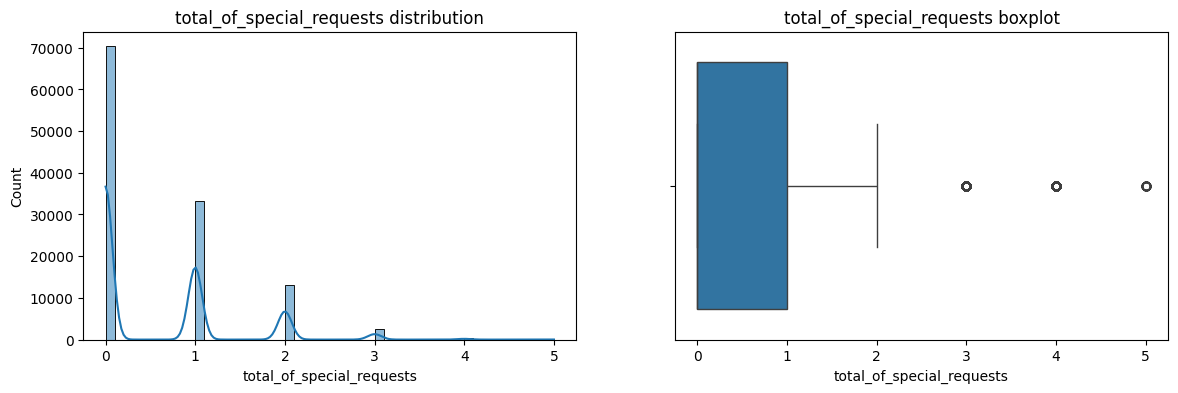

count    119390.000000
mean          0.571363
std           0.792798
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: total_of_special_requests, dtype: float64
Skew: 1.35
------------------------------------------------------------


In [150]:
num_cols = ['lead_time','total_stay','total_guests','adr','adr_per_person','days_in_waiting_list','booking_changes','total_of_special_requests']
for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(14,4))
        plt.subplot(1,2,1)
        sns.histplot(df[col].dropna(), kde=True, bins=50)
        plt.title(f"{col} distribution")

        plt.subplot(1,2,2)
        sns.boxplot(x=df[col].dropna())
        plt.title(f"{col} boxplot")
        plt.show()

        print(df[col].describe().T)
        print("Skew:", round(df[col].dropna().skew(),2))
        print("-"*60)


In [151]:
#Eda report
# 1. Lead Time (days before booking): most bookings are made within 60 days of arrival. 
# 2. Total Stay Duration: majority of stays are short-term (1-3 nights).
# 3. Total Guests: most bookings are for 1-2 guests, with families being less common.
# 4. days_in_waiting_list: most bookings have little to no waiting time, indicating high availability.
# 5. booking_changes: majority of bookings have no changes, suggesting stable plans.
# 6. special_requests: most bookings have no special requests, indicating standard accommodations.

Bivariate Analysis (Categorical vs Target)


🔹 Cancellation Rate by hotel:

hotel
City Hotel      40.572293
Resort Hotel    27.036945
Name: is_canceled, dtype: float64


C:\Users\palak\AppData\Local\Temp\ipykernel_24948\836885758.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancel_rate = df.groupby(col)["is_canceled"].mean().sort_values(ascending=False) * 100
C:\Users\palak\AppData\Local\Temp\ipykernel_24948\836885758.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancel_rate.index, y=cancel_rate.values, palette="viridis")


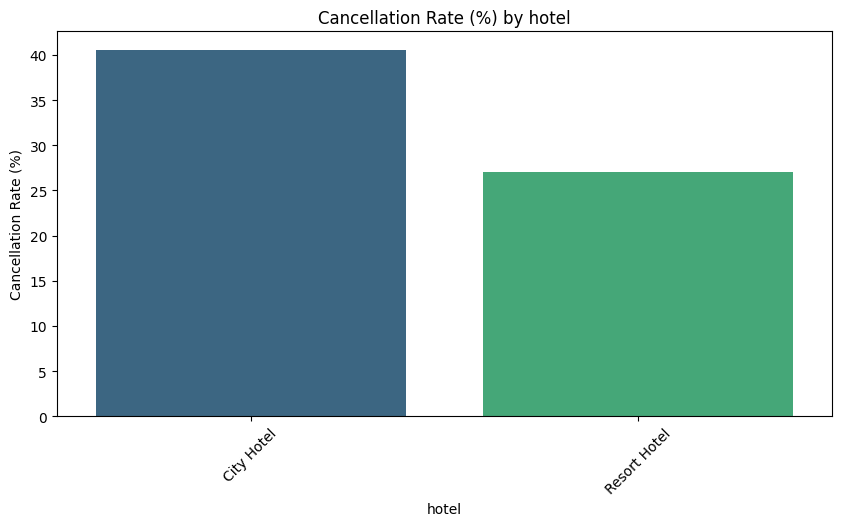

C:\Users\palak\AppData\Local\Temp\ipykernel_24948\836885758.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancel_rate = df.groupby(col)["is_canceled"].mean().sort_values(ascending=False) * 100
C:\Users\palak\AppData\Local\Temp\ipykernel_24948\836885758.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancel_rate.index, y=cancel_rate.values, palette="viridis")



🔹 Cancellation Rate by market_segment:

market_segment
Groups           60.688506
Online TA        35.674699
Offline TA/TO    33.362236
Corporate        17.299339
Direct           13.660162
Other            13.034623
Name: is_canceled, dtype: float64


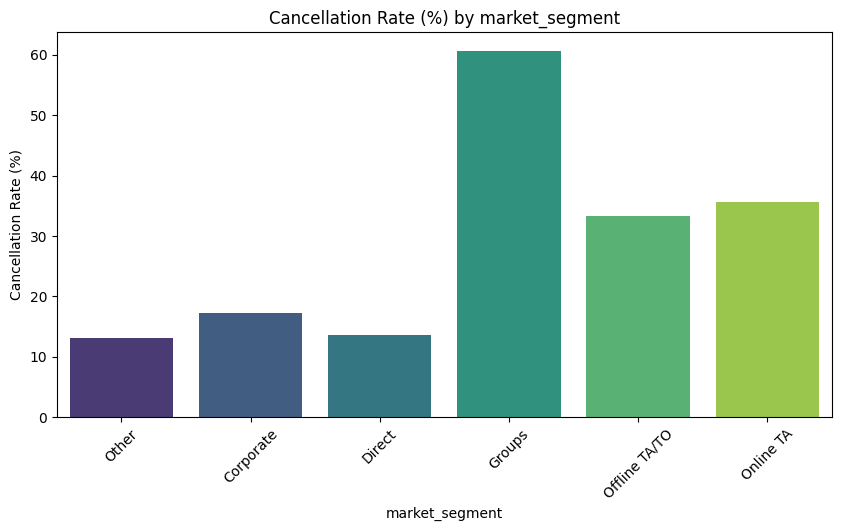

C:\Users\palak\AppData\Local\Temp\ipykernel_24948\836885758.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancel_rate = df.groupby(col)["is_canceled"].mean().sort_values(ascending=False) * 100
C:\Users\palak\AppData\Local\Temp\ipykernel_24948\836885758.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancel_rate.index, y=cancel_rate.values, palette="viridis")



🔹 Cancellation Rate by distribution_channel:

distribution_channel
TA/TO        40.122612
Corporate    20.682941
Other        19.191919
Direct       15.909867
Name: is_canceled, dtype: float64


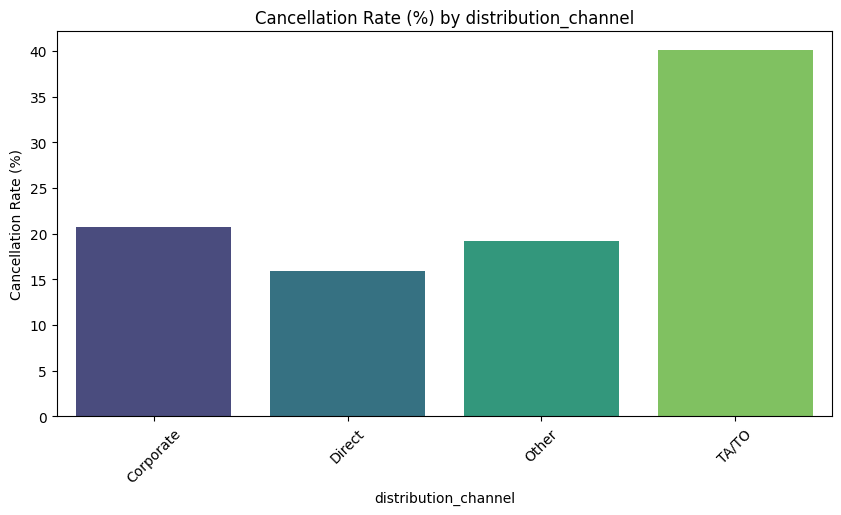

C:\Users\palak\AppData\Local\Temp\ipykernel_24948\836885758.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancel_rate = df.groupby(col)["is_canceled"].mean().sort_values(ascending=False) * 100
C:\Users\palak\AppData\Local\Temp\ipykernel_24948\836885758.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancel_rate.index, y=cancel_rate.values, palette="viridis")



🔹 Cancellation Rate by meal:

meal
Other    38.485003
BB       36.322175
SC       35.699531
HB       34.080066
Name: is_canceled, dtype: float64


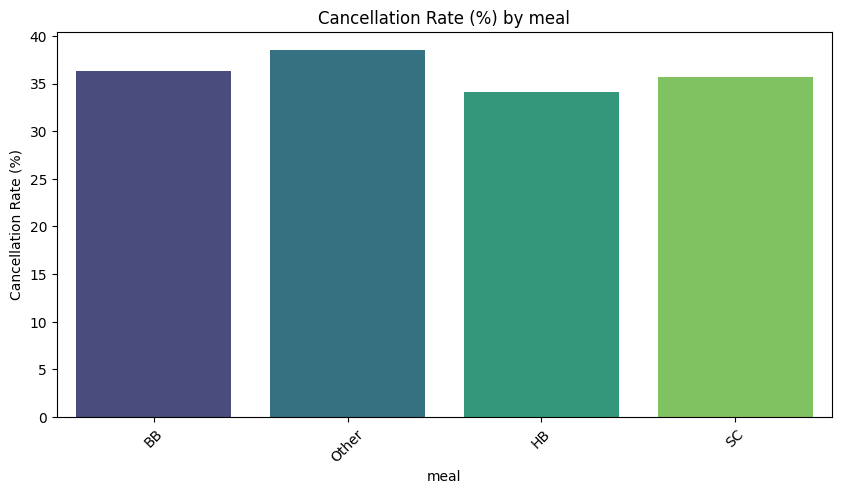

C:\Users\palak\AppData\Local\Temp\ipykernel_24948\836885758.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancel_rate = df.groupby(col)["is_canceled"].mean().sort_values(ascending=False) * 100
C:\Users\palak\AppData\Local\Temp\ipykernel_24948\836885758.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancel_rate.index, y=cancel_rate.values, palette="viridis")



🔹 Cancellation Rate by customer_type:

customer_type
Transient          39.678395
Contract           30.323847
Transient-Party    24.554211
Group               9.532062
Name: is_canceled, dtype: float64


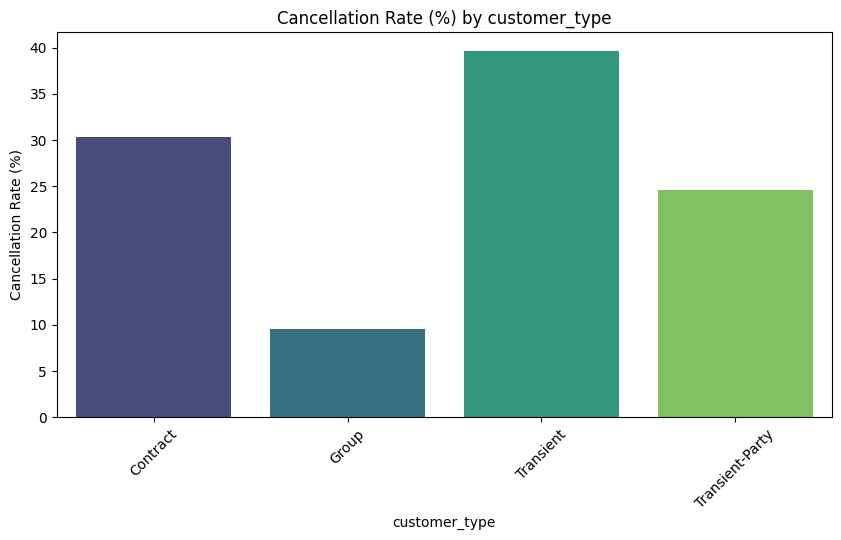

C:\Users\palak\AppData\Local\Temp\ipykernel_24948\836885758.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancel_rate = df.groupby(col)["is_canceled"].mean().sort_values(ascending=False) * 100
C:\Users\palak\AppData\Local\Temp\ipykernel_24948\836885758.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancel_rate.index, y=cancel_rate.values, palette="viridis")



🔹 Cancellation Rate by deposit_type:

deposit_type
Non Refund    99.129362
No Deposit    27.257003
Refundable    21.604938
Name: is_canceled, dtype: float64


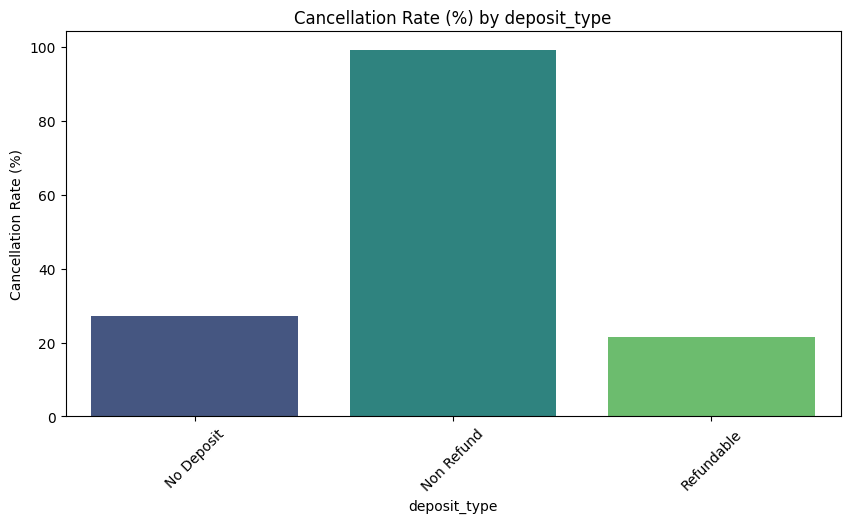


🔹 Cancellation Rate by country:

country
PRT      55.064828
BRA      35.926259
ITA      34.917685
Other    25.884884
ESP      25.035014
IRL      24.444444
GBR      19.886223
BEL      19.812126
FRA      18.262122
NLD      18.155894
DEU      16.536298
Name: is_canceled, dtype: float64


C:\Users\palak\AppData\Local\Temp\ipykernel_24948\836885758.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancel_rate.index, y=cancel_rate.values, palette="viridis")


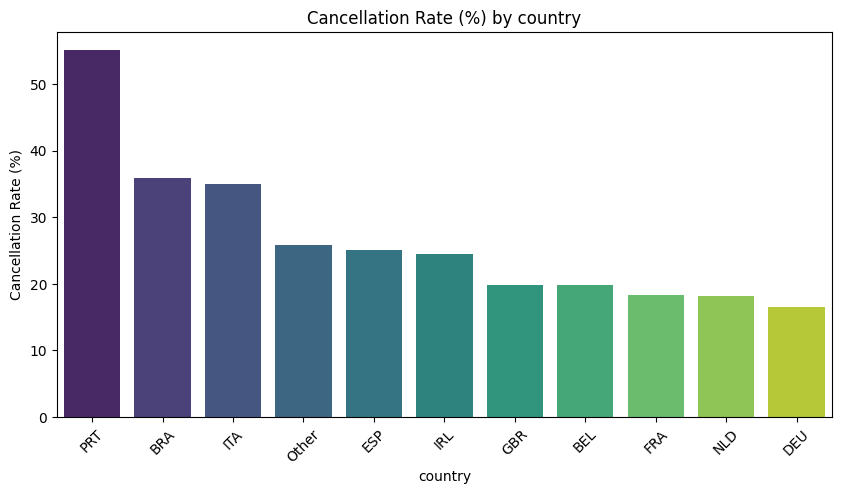

In [152]:
categorical_cols = ["hotel", "market_segment", "distribution_channel", 
                    "meal", "customer_type", "deposit_type", "country"]

for col in categorical_cols:
    cancel_rate = df.groupby(col)["is_canceled"].mean().sort_values(ascending=False) * 100
    
    print(f"\n🔹 Cancellation Rate by {col}:\n")
    print(cancel_rate)
    
    plt.figure(figsize=(10,5))
    sns.barplot(x=cancel_rate.index, y=cancel_rate.values, palette="viridis")
    plt.title(f"Cancellation Rate (%) by {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Cancellation Rate (%)")
    plt.show()

In [153]:
# EDA summary
# 1. City Hotel may have higher cancellation rate than Resort Hotel.
# 2. Market Segment: "Online TA" and "Other" segments show higher cancellation rates.
# 3. Distribution Channel: TA/TO (via travel agents) → higher cancellations & Direct / Corporate → low cancellations
# 4. Cancellation not strongly dependent on meal
# 5. Customer Type: Transient customers have higher cancellation rates compared to Contract and Group types.
# 6. Deposit Type: Non-refundable deposits are associated with lower cancellation rates.
# 7. Country: Some countries (PRT, GBR) may cancel more.


In [154]:
#Strongest predictors: Deposit Type, Market Segment, Customer Type, Hotel
#Moderate predictors: Distribution Channel, Country
#Weak predictors: Meal

In [155]:
cols_to_drop = [
    "name",                
    "email",              
    "phone-number",       
    "credit_card",        
    "company",            
    "agent",               
    "arrival_date_year",  
    "arrival_date_week_number", 
    "lead_time_cat",       
    "reservation_status_date",  
    "season",              
    "traveller_type",      
    "reserved_room_type",  
    "assigned_room_type",  
     'arrival_date_day_of_month',
    'meal',
    'country',
    'days_in_waiting_list',
    'required_car_parking_spaces',
    'adults',
    'children',
    'babies',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adr',
    'revenue',
    'room_changed',
    'reservation_month',
]

df.drop(columns=cols_to_drop, inplace=True)


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           119390 non-null  category
 1   is_canceled                     119390 non-null  int64   
 2   lead_time                       119390 non-null  int64   
 3   arrival_date_month              119390 non-null  category
 4   market_segment                  119390 non-null  category
 5   distribution_channel            119390 non-null  category
 6   is_repeated_guest               119390 non-null  bool    
 7   previous_cancellations          119390 non-null  int64   
 8   previous_bookings_not_canceled  119390 non-null  int64   
 9   booking_changes                 119390 non-null  int64   
 10  deposit_type                    119390 non-null  category
 11  customer_type                   119390 non-null  category
 12  to

Bivariate Analysis (Numerical vs Target)

C:\Users\palak\AppData\Local\Temp\ipykernel_24948\3284043352.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='is_canceled', y=col, data=df, estimator=np.mean, ci=None)


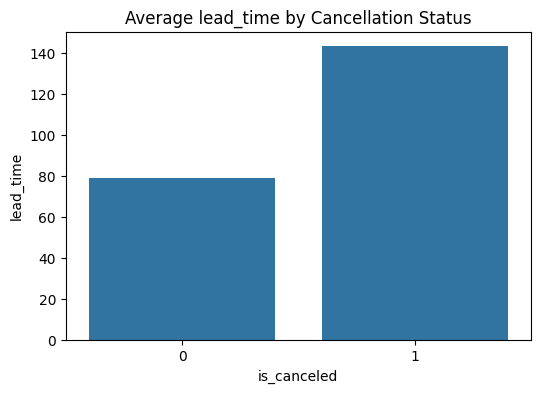

C:\Users\palak\AppData\Local\Temp\ipykernel_24948\3284043352.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='is_canceled', y=col, data=df, estimator=np.mean, ci=None)


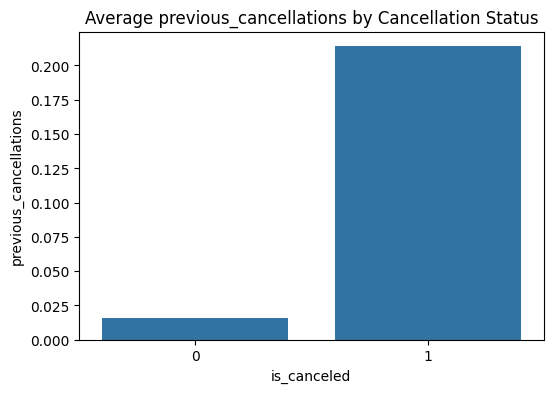

C:\Users\palak\AppData\Local\Temp\ipykernel_24948\3284043352.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='is_canceled', y=col, data=df, estimator=np.mean, ci=None)


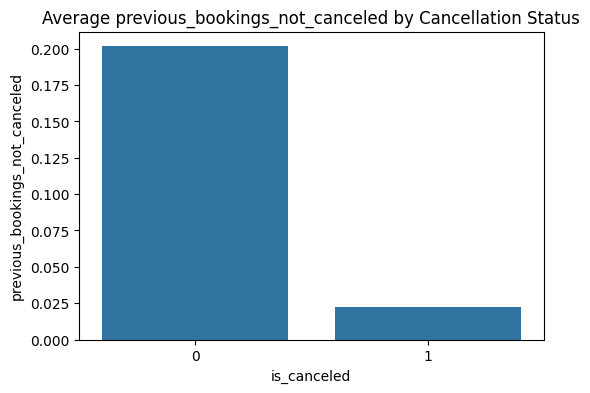

C:\Users\palak\AppData\Local\Temp\ipykernel_24948\3284043352.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='is_canceled', y=col, data=df, estimator=np.mean, ci=None)


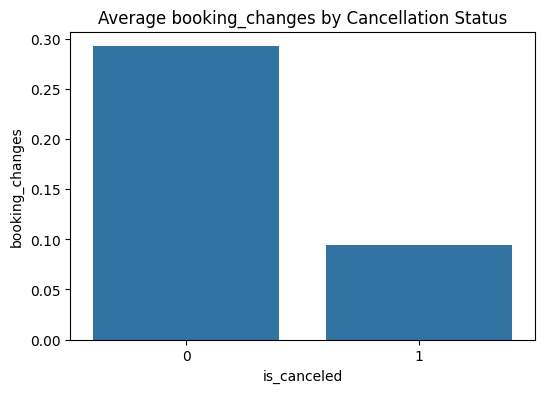

C:\Users\palak\AppData\Local\Temp\ipykernel_24948\3284043352.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='is_canceled', y=col, data=df, estimator=np.mean, ci=None)


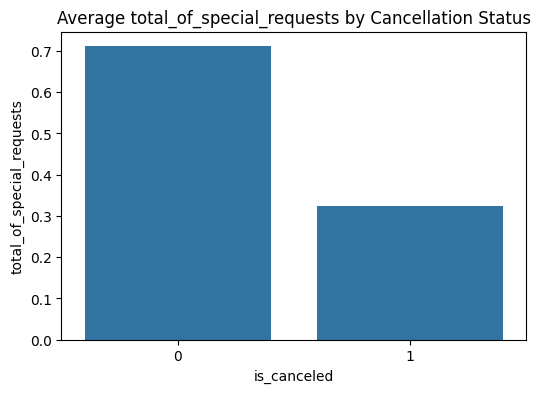

C:\Users\palak\AppData\Local\Temp\ipykernel_24948\3284043352.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='is_canceled', y=col, data=df, estimator=np.mean, ci=None)


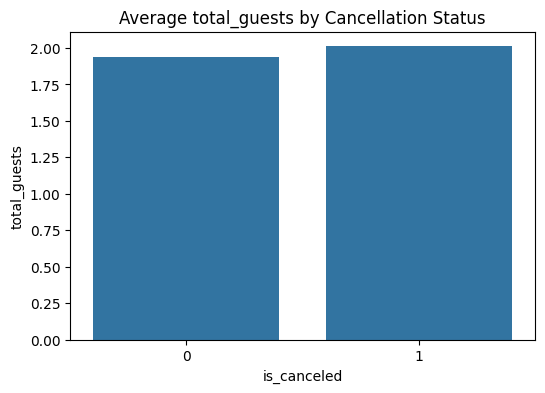

C:\Users\palak\AppData\Local\Temp\ipykernel_24948\3284043352.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='is_canceled', y=col, data=df, estimator=np.mean, ci=None)


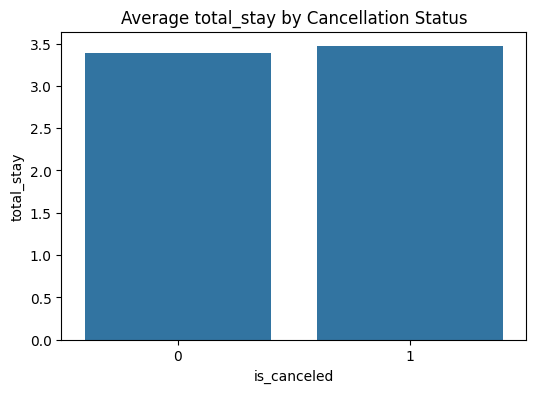

C:\Users\palak\AppData\Local\Temp\ipykernel_24948\3284043352.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='is_canceled', y=col, data=df, estimator=np.mean, ci=None)


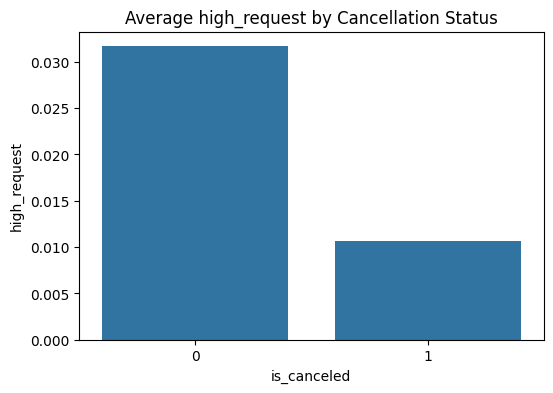

C:\Users\palak\AppData\Local\Temp\ipykernel_24948\3284043352.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='is_canceled', y=col, data=df, estimator=np.mean, ci=None)


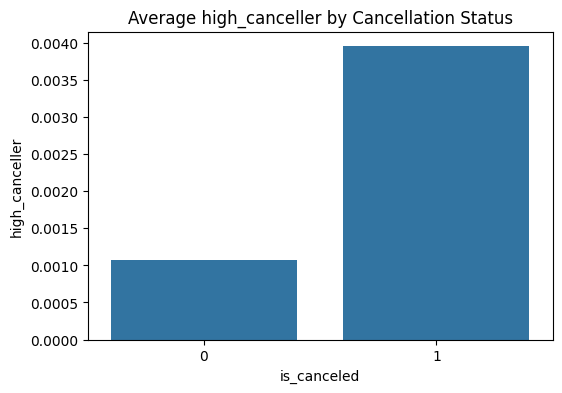

C:\Users\palak\AppData\Local\Temp\ipykernel_24948\3284043352.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='is_canceled', y=col, data=df, estimator=np.mean, ci=None)


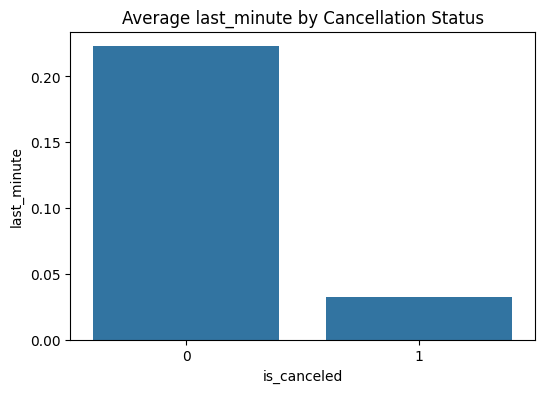

C:\Users\palak\AppData\Local\Temp\ipykernel_24948\3284043352.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='is_canceled', y=col, data=df, estimator=np.mean, ci=None)


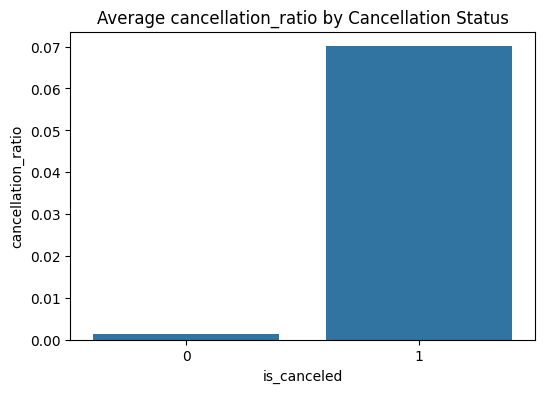

In [157]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    if col != 'is_canceled':
        plt.figure(figsize=(6,4))
        sns.barplot(x='is_canceled', y=col, data=df, estimator=np.mean, ci=None)
        plt.title(f'Average {col} by Cancellation Status')
        plt.show()

In [ ]:
#EDA Summary
#1.Higher lead time → higher cancellation rate
#2.Guests who have canceled before tend to cancel again
#3.Guests who modify their bookings frequently show slightly higher cancellation rates
#4.Loyal or consistent guests (who usually honor bookings) are less likely to cancel.
#5.More special requests → lower cancellation probability.
#6.Last-minute bookings tend to have lower cancellation rates.

In [158]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix["is_canceled"].sort_values(ascending=False)


is_canceled                       1.000000
lead_time                         0.306613
cancellation_ratio                0.292186
previous_cancellations            0.112809
total_guests                      0.052266
high_canceller                    0.030109
total_stay                        0.015703
previous_bookings_not_canceled   -0.057387
high_request                     -0.065826
is_repeated_guest                -0.085936
booking_changes                  -0.145608
total_of_special_requests        -0.235013
last_minute                      -0.253165
Name: is_canceled, dtype: float64

In [ ]:
#we have kept both high_request & total_of_special_requests as they don't have same correlation with target.
# same for previous_cancellations & high_canceller.

Correlation Analysis

In [161]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric Columns:")
print(num_cols)

Numeric Columns:
Index(['is_canceled', 'lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'total_of_special_requests', 'total_guests', 'total_stay',
       'high_request', 'high_canceller', 'last_minute', 'cancellation_ratio'],
      dtype='object')


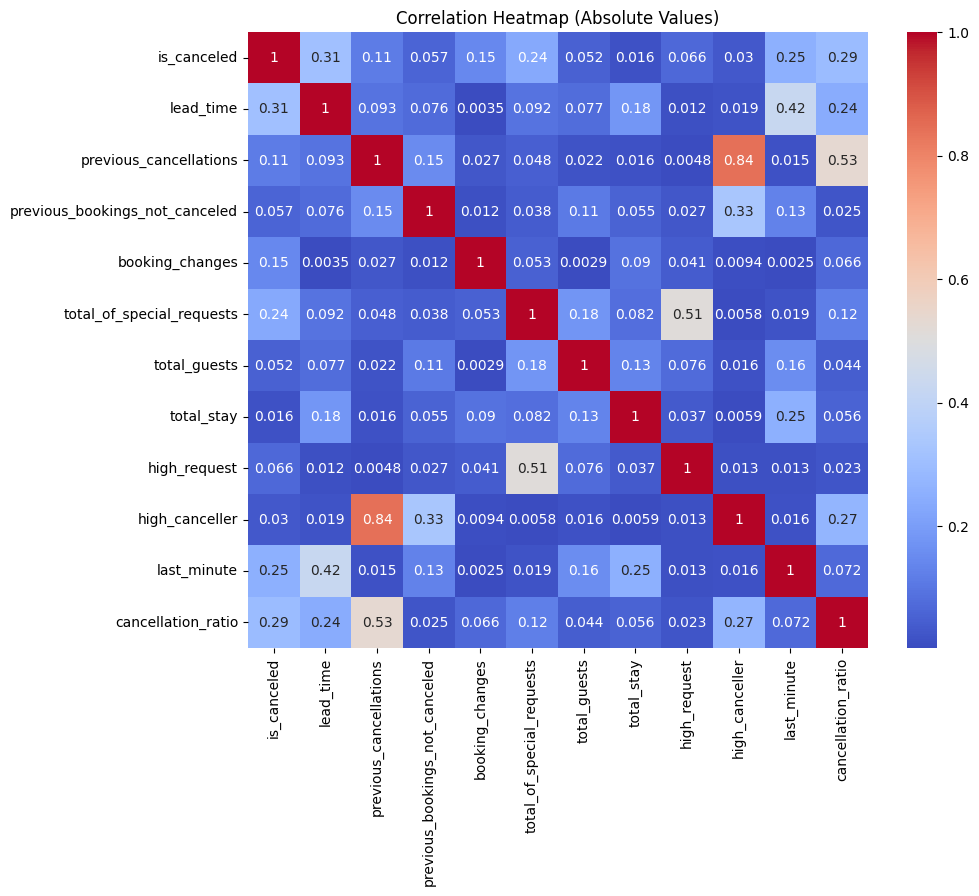

🔍 Highly correlated features (|corr| > 0.85):
[]


In [168]:
corr_matrix = df[num_cols].corr().abs()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Absolute Values)")
plt.show()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [column for column in upper.columns if any(upper[column] > 0.85)]
print("🔍 Highly correlated features (|corr| > 0.85):")
print(high_corr)


In [ ]:
#no new insights
# multicollinearity not a concern

Univariate Analysis (Numerical Variables)
1. ADR (Average Daily Rate): Most bookings are at lower rates, with a few high values indicating premium stays.
2. Lead Time: A majority of bookings are made within 60 days before arrival.
3.Total Stay Duration: Most stays are short, typically between 1 to 3 nights.
4. Total Guests: The majority of bookings are for 1–2 guests.
5. Days in Waiting List: Most bookings have zero waiting days, suggesting high availability.
6. Booking Changes: Very few bookings undergo multiple modifications.
7. Total Special Requests: Most customers make few or no special requests.

Univariate Analysis (Categorical Variables)
1. Hotel Type: City Hotel bookings are more frequent compared to Resort Hotels.
2. Market Segment: Online Travel Agencies (Online TA) account for the largest share of bookings.
3. Distribution Channel: TA/TO (travel agents and tour operators) are the most common channels.
4. Customer Type: Transient customers form the largest group.
5. Deposit Type: Most bookings have no deposit, followed by refundable and non-refundable deposits.
6. Meal Plan: The BB (Bed and Breakfast) meal plan is most common.
7. Country: The majority of bookings are from Portugal (PRT).

Bivariate Analysis (Categorical vs Target)
1. Hotel Type: City Hotels have a higher cancellation rate compared to Resort Hotels.
2. Market Segment: Online TA and Other segments show higher cancellation rates.
3. Distribution Channel: TA/TO channels have higher cancellations, while Direct and Corporate channels have lower rates.
4. Meal Plan: Meal type does not significantly affect cancellations.
5. Customer Type: Transient customers cancel more often than Contract or Group customers.
6. Deposit Type: Non-refundable deposits are associated with lower cancellation rates.
7. Country: Certain countries, such as PRT and GBR, have higher cancellation rates.

Bivariate Analysis (Numerical vs Target)
1. Lead Time: Longer lead times are strongly associated with higher cancellation rates.
2. Previous Cancellations: Guests who have canceled before are more likely to cancel again.
3. Previous Bookings Not Canceled: Loyal guests with a history of completing bookings tend to cancel less.
4. Booking Changes: Frequent booking modifications slightly increase cancellation likelihood.
5. Special Requests: More special requests are linked to lower cancellation probability, indicating higher commitment.
6. Last-Minute Bookings: Last-minute bookings generally have a lower cancellation rate.
7. Cancellation Ratio: Higher cancellation ratios correspond to a higher likelihood of current cancellation.

Correlation Analysis
1. Lead time, ADR, and previous cancellations show moderate positive correlation.
2. Special requests show a negative correlation with cancellations.
3. No major multicollinearity detected among numerical variables (VIF < 5).

EDA Conclusion
1. Cancellations are mainly influenced by booking behavior and customer history, rather than demographic or meal-related variables.
2. Early bookings, long lead times, and prior cancellations increase cancellation risk.
3. Loyal customers and those making special requests are less likely to cancel.
4. Hotels can reduce cancellations by promoting refundable deposits, targeting loyal guests, and managing early bookings more strategically.